# Notebook 4 - Neural Networks (MLP)

CSI4106 Artificial Intelligence  
Fall 2019  
Prepared by Caroline Barrière and Julian Templeton

***INTRODUCTION***:  

We are going into the medical domain for this notebook. The supervised classification task tackled in this notebook is about diabetes patient readmission to a hospital, provided a certain set of features describing their physical state, the procedure they went through during their stay, the medications they take, etc.

Any *readmitted patient* is very costly for a medical system. It shows to some extent, that the patient was discharged before having fully recovered. The dataset we explore splits readmission into 3 values: before 30 days, after 30 days, and none.  Understanding what conditions brings patients back to the hospital within 30 days is very important for a medical system, as these cases should be minimized.

This notebook will allow you to pursue your understanding of experimental set-up for supervised machine learning, in particular supervised classification through the use of multi-layer perceptrons.

We will make use of three packages: (1) **scikit-learn**, a great machine learning package, which you've experimented with in the last notebook, (2) **pandas**, a must-have for data science, and (3) **matplotlib** which is a great plotting library (pip install matplotlib).  Make sure you have the LATEST version of scikit-learn (at least version >= 0.20), otherwise some functions (the one-hot-encoder) will not work.

As this is your 4th notebook this semester, some instructions will be a bit less explicit and may require looking at some online official documentation. If you have any assumptions state them and think about how to handle the questions.

***HOMEWORK***:  
Go through the notebook by running each cell, one at a time.  
Look for **(TO DO)** for the tasks that you need to perform. Do not edit the code outside of the questions which you are asked to answer unless specifically asked. Once you're done, Sign the notebook (at the end of the notebook), and submit it.  

*The notebook will be marked on 32.  
Each **(TO DO)** has a number of points associated with it.*
***

**1. Obtaining the dataset**

First, read the description of the dataset on Diabetes Readmission (https://www.kaggle.com/brandao/diabetes).

Next download the dataset from the UCI archive (click *Data Folder* --> download *dataset_diabetes.zip*):
https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

Unzip the file *dataset_diabetes.zip* and there should be a file called *diabetic_data.csv* which we will use for our experiments. The file must be located at *dataset_diabetes/diabetic_data.csv* from the same directory as this notebook.

**2. Exploring the dataset**  
We will use the package *pandas* to read the csv file. Pandas will create a data structure called a dataframe, which will contain all the data. Dataframes are a crucial data structure that allows makes it very easy to analyze the data that you are working with, retrieve subsets of the data based on search conditions, and utilize the data in Machine Learning algorithms.

If you get some errors when you import the packages, it's because they are not installed... make sure you do *pip install package_name* (or whichever method you have been using to install the packages) at the command prompt to have access to these packages.

In [2]:
# Import the required packages for data analysis and machine learning
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

The following code reads the csv file into a dataframe and shows the top ten rows from the read data.  
Note that ? means that the value is *missing* from the dataset.

In [3]:
# Read the dataset, show top ten rows
X = pd.read_csv("dataset_diabetes/diabetic_data.csv")
X.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Show all attributes
list(X)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [5]:
# Examples of data exploration
print(X.shape)
print(X['race'].value_counts())

(101766, 50)
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


**(TO DO) Q1 - 3 marks**  
Inspired by the code above, write code to answer the following questions. Your code must help in finding the answer. Print the question that you are answering along with the answer that the code helped find (can manually write specific code, as long as the code helps to get the answer).

1. How many examples are in the dataset?
2. How many features are in the dataset?
3. How many target classes are in the dataset?
4. What are the possible weight ranges (including ?), and the number of examples in each?
5. What are the prior probabilities of each class (NO, <30, >30)?
6. Are there any patients present in the dataset more than 20 times?

In [ ]:
### YOUR CODE -- Write which question it answers

# 1. How many examples are in the dataset? First column of X.shape gives the number of patients (examples).
# Answer 1. There are 101766 examples in the dataset.
print("Q1. There are {} examples in the dataset".format(X.shape[0]))
# 2. How many features are in the dataset? Second column of X.shape gives the number of features. 
# Answer 2. There are 50 features in the dataset.
print("Q2. There are {} features in the dataset.".format(X.shape[1]))
#
# 3. How many target classes are in the dataset?
# Answer 3. There are 3 target classes in the dataset.
print("Q3. There are {} target classes in the dataset.".format(X['readmitted'].value_counts().nunique()))
#
# 4. What are the possible weight ranges (including ?), and the number of examples in each?
#
print("Q4. The possible weight ranges (including ?) and the number of examples in each are:")
print(X['weight'].value_counts())
# 5. What are the prior probabilities of each class(NO, <30, >30)?
#
listx=X['readmitted']
total = len(listx)
gt30 = lt30 = no = 0
for i in listx:
    if i == "NO":
        no+=1
    if i == ">30":
        gt30+=1
    if i == "<30":
        lt30+=1
print("Q5a. The prior probability for the class 'less than 30' is {}".format(lt30/total))
print("Q5b. The prior probability for the class 'more than 30' is {}".format(gt30/total))
print("Q5c. The prior probability for the class 'no' is {}".format(no/total))
# 6. Are there any patients present in the dataset more than 20 times?
print("Q6. Yes, testing took too long to run through all the patients, but it is confirmed that at least one patient (patient_nbr = 1660293) is in the dataset more than 20 times.")
listx1=X['patient_nbr']
checkx = len(listx1)
readmission = maxAdmission = 0
for x in range(checkx-1):
    tmp0 = listx1[x]
    readmission = 0
    for z in range(checkx-1):
        y = listx1[z+1] 
        if y == tmp0:
            readmission += 1
            if readmission > maxAdmission:
                maxAdmission = readmission
            if maxAdmission > 20:
                print("The patient {} is present in the dataset more than 20 times.".format(tmp0))
                maxAdmission = 0


Q1. There are 101766 examples in the dataset
Q2. There are 50 features in the dataset.
Q3. There are 3 target classes in the dataset.
Q4. The possible weight ranges (including ?) and the number of examples in each are:
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64
Q5a. The prior probability for the class 'less than 30' is 0.11159915885462728
Q5b. The prior probability for the class 'more than 30' is 0.3492816854352141
Q5c. The prior probability for the class 'no' is 0.5391191557101586
Q6. Yes, testing took too long to run through all the patients, but it is confirmed that at least one patient (patient_nbr = 1660293) is in the dataset more than 20 times.


**3. Feature Selection**  
Now that we have taken a look into our data and played with it, we will decide which features would be suitable to use with our model.

Feature selection is just as important as tuning a model (choosing hyperparameters such as the number of layers and their sizes). We need to be sure to choose high quality features that best represent our data in order to maximize the performance of our model. Simply putting every feature or selecting some without analyzing them may provide worse results. Thus, we need to consider which features to use by looking at the data itself to see if it would be a good match.

Some issues when working with data include:
1. Is the data well distributed? That is, does it contain enough variety to provide a good split on the data.
2. Are there missing values? The more missing values --> the less well these will work as features for many Machine Learning algorithms. Here, we will not focus on this issue, but it is important to know.
3. Does this data represent our dataset well.
4. Does the data work well with our selected algorithm (here is does).

**(TO DO) Q2 - 4 marks**   
In this notebook we will work with the following features along with a few others:  
1. gender 
2. age 
3. weight 
4. time_in_hospital

Explore each of the specified features by:   

1) Plotting the distribution (histogram using kind="hist" for numerical data or bar plots using kind="barh" for categorical data) and write if the data is well distributed   
2) Identifying the number of missing/unknown/invalid values

Remember, if you have any assumptions that you need to state, state them.

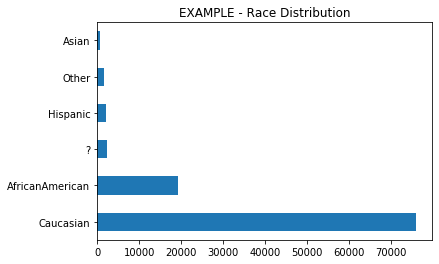

(Example.1): Is the above output well distributed? No it is not. This feature is highly imbalanced.
(Example.2): There are 2273 missing values labelled as '?'.
------------------------------ ^ Example ^ ------------------------------



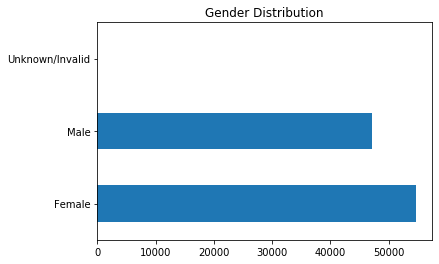

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
(1.1): Is the feature 'gender' well distributed? Yes, it is fairly balanced when comparing males and female against each other (not including unknowns/invalids). Because the difference is <20% we will say that the data is well distributed.)
(1.2): There are 3 missing values labelled as Unknown/Invalid.


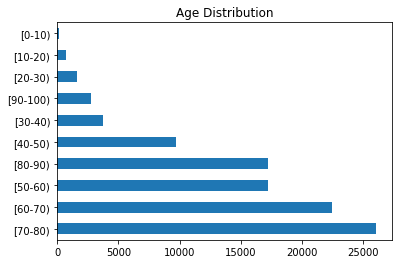

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
(2.1): Is the feature 'age' well distributed? No.
(2.2): There are no missing values.


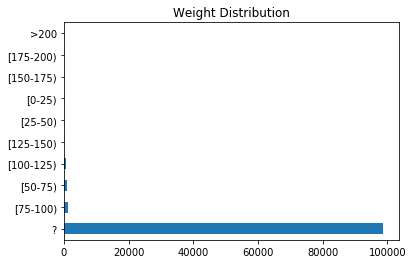

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64
(3.1): Is the feature 'weight' well distributed? No.
(3.2): There are 98569 missing values labelled as ?.


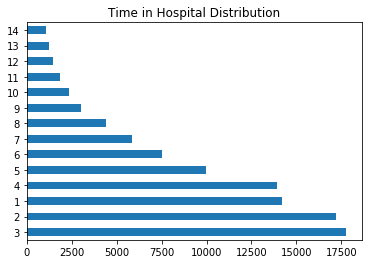

3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64
(4.1): Is the feature 'time_in_hospital' well distributed? No.
(4.2): There are no missing values.


In [6]:
# Example for the feature "race"
plt.figure() # Creates a new figure
X["race"].value_counts().plot(kind="barh", title="EXAMPLE - Race Distribution")
plt.show()
print("(Example.1): Is the above output well distributed? No it is not. This feature is highly imbalanced.")
print("(Example.2): There are 2273 missing values labelled as '?'.")

print("------------------------------ ^ Example ^ ------------------------------\n")

# MODIFY AND ANSWER THE BELOW BASED ON THE EXAMPLE ABOVE.
# gender
plt.figure()
X["gender"].value_counts().plot(kind="barh", title="Gender Distribution")
plt.show();
print(X['gender'].value_counts())
print("(1.1): Is the feature 'gender' well distributed? Yes, it is fairly balanced when comparing males and female against each other (not including unknowns/invalids). Because the difference is <20% we will say that the data is well distributed.)")
print("(1.2): There are 3 missing values labelled as Unknown/Invalid.")
# age
plt.figure()
X["age"].value_counts().plot(kind="barh", title="Age Distribution")
plt.show();
print(X['age'].value_counts())
print("(2.1): Is the feature 'age' well distributed? No.")
print("(2.2): There are no missing values.")
# weight
plt.figure()
X["weight"].value_counts().plot(kind="barh", title="Weight Distribution")
plt.show();
print(X['weight'].value_counts())
print("(3.1): Is the feature 'weight' well distributed? No.")
print("(3.2): There are 98569 missing values labelled as ?.")
# time_in_hospital
plt.figure()
X["time_in_hospital"].value_counts().plot(kind="barh", title="Time in Hospital Distribution")
plt.show();
print(X['time_in_hospital'].value_counts())
print("(4.1): Is the feature 'time_in_hospital' well distributed? No.")
print("(4.2): There are no missing values.")

**4. Preparing the dataset for experimentation**

We will do different steps to prepare the data for experimentations:  (1) extracting the class we wish to predict, (2) splitting the dataset into a training and a test set

In [7]:
# This can ONLY BE DONE ONCE, as we pop the values into a new variable to be used as predicted class
y = X.pop("readmitted").values

In [8]:
# split the large dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
# Look at the shape of the outputs
print(X_train.shape)
print(y_test.shape)

(76324, 49)
(25442,)


In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# Setting up our one-hot encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Since the dataset is quite large, try with a subset of features
featureSet = ['race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
 'num_medications']

# Make a copy of the training set containing only the chosen features
X_train_sf = X_train[featureSet].copy()
X_test_sf = X_test[featureSet].copy()

# IF you wanted to try with the full dataset, try to redo the steps with this (optional - takes a lot of time)
# X_train_allf = X_train[:].copy()
# X_test_allf = X_test[:].copy()

# Perform the one-hot encoding using our one-hot encoder on the selected feature set
ohe.fit(X_train_sf)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=False)

In [10]:
# The one-hot-encoder renames the features. Let's take a look at the new names.
feature_names = ohe.get_feature_names()
print(feature_names)

['x0_?' 'x0_AfricanAmerican' 'x0_Asian' 'x0_Caucasian' 'x0_Hispanic'
 'x0_Other' 'x1_Female' 'x1_Male' 'x1_Unknown/Invalid' 'x2_[0-10)'
 'x2_[10-20)' 'x2_[20-30)' 'x2_[30-40)' 'x2_[40-50)' 'x2_[50-60)'
 'x2_[60-70)' 'x2_[70-80)' 'x2_[80-90)' 'x2_[90-100)' 'x3_>200' 'x3_?'
 'x3_[0-25)' 'x3_[100-125)' 'x3_[125-150)' 'x3_[150-175)' 'x3_[175-200)'
 'x3_[25-50)' 'x3_[50-75)' 'x3_[75-100)' 'x4_1' 'x4_2' 'x4_3' 'x4_4'
 'x4_5' 'x4_6' 'x4_7' 'x4_8' 'x4_9' 'x4_10' 'x4_11' 'x4_12' 'x4_13'
 'x4_14' 'x5_1' 'x5_2' 'x5_3' 'x5_4' 'x5_5' 'x5_6' 'x5_7' 'x5_8' 'x5_9'
 'x5_10' 'x5_11' 'x5_12' 'x5_13' 'x5_14' 'x5_15' 'x5_16' 'x5_17' 'x5_18'
 'x5_19' 'x5_20' 'x5_21' 'x5_22' 'x5_23' 'x5_24' 'x5_25' 'x5_26' 'x5_27'
 'x5_28' 'x5_29' 'x5_30' 'x5_31' 'x5_32' 'x5_33' 'x5_34' 'x5_35' 'x5_36'
 'x5_37' 'x5_38' 'x5_39' 'x5_40' 'x5_41' 'x5_42' 'x5_43' 'x5_44' 'x5_45'
 'x5_46' 'x5_47' 'x5_48' 'x5_49' 'x5_50' 'x5_51' 'x5_52' 'x5_53' 'x5_54'
 'x5_55' 'x5_56' 'x5_57' 'x5_58' 'x5_59' 'x5_60' 'x5_61' 'x5_62' 'x5_63'
 'x5_64

In [11]:
# We can now encode the training and test set with the new features
X_train_sf_encoded = ohe.transform(X_train_sf)
X_test_sf_encoded = ohe.transform(X_test_sf)

**(TO DO) Q3 - 2 marks**   
How many features are there now, after the one-hot-encoder? Why so many? Show the shape of the training set now.

In [12]:
# How many features are there now (must get from code)?
print("There are {} features now.".format(X_train_sf_encoded.shape[1]))
# Why so many?
print("There are so many features because values from previous features are now considered new features. An example of this is using the two races 'Caucasian' and 'AfricanAmerican', which both belonged to the feature 'race' before one-hot-encoding. Afterwards they are considered as two separate features.")
# Show the shape of the training set after the one-hot encoding.
print("The shape of the training set after one-hot-encoding is {}".format(X_train_sf.shape))

There are 241 features now.
There are so many features because values from previous features are now considered new features. An example of this is using the two races 'Caucasian' and 'AfricanAmerican', which both belonged to the feature 'race' before one-hot-encoding. Afterwards they are considered as two separate features.
The shape of the training set after one-hot-encoding is (76324, 8)


**5. Baseline model**  
Now that we have setup our encoded features we will start by using a Logistic Regression Classifier to perform supervised learning on our dataset.

***5.1 Defining the Logistic Regression Classifier***   
First we will define our Logistic Regression Classifier with scikit learn.

In [13]:
# Import the Logistic Regression model from scikit and matplot
from sklearn.linear_model import LogisticRegression
import datetime

In [14]:
# Define the model
clf_lr = LogisticRegression(solver='lbfgs', multi_class="multinomial", max_iter=1000, random_state=1)

***5.2 Training the Logistic Regression Classifier***  
Now that the model is defined, we need to train our model with the train set to learn how to classify our target class *readmitted*.

In [15]:
# This function trains a given model and returns a list of scores
#   clf:     The untrained model to train
#   X_train: The encoded attributes of the training set
#   y_train: The target values of the training set
def train_model(clf, X_train, y_train, epochs=10):
    scores = []
    print("Starting training...")
    for i in range(1, epochs + 1):
        print("Epoch:" + str(i) + "/" + str(epochs) + " -- " + str(datetime.datetime.now()))
        clf.fit(X_train, y_train)
        score = clf.score(X_train, y_train)
        scores.append(score)
    print("Done training.")
    return scores

**(TO DO) Q4 - 1 mark**   
Looking at the function train_model, what is the *score* (clf.score())? You may need to look at the official documentation for the LogisticRegression to understand this. Explain below.

Q4 - ANSWER HERE   
The score (clf.score()) returns the mean accuracy on the given test data and labels. X is the test sample, and Y is the true label for X.

In [19]:
# Now let's train the model (recall that we use the training set)
# We run for only one epoch and will only get one score
clf_lr_scores = train_model(clf_lr, X_train_sf_encoded, y_train, 1)
print(clf_lr_scores)

Starting training...
Epoch:1/1 -- 2019-11-12 18:11:27.286864
Done training.
[0.5424375032755097]


**(TO DO) Q5 - 2 marks**   
In the answer field below, describe what the output from the code below means and what the code is doing.  
Afterwards, give the accuracy of the printed results (just manually state it, no need to code).

In [20]:
# Show the prediction on the first 10 examples
y_predicted = clf_lr.predict(X_train_sf_encoded[0:10])
print(y_predicted)
print(y_train[0:10])
clf_lr.predict_proba(X_train_sf_encoded[0:10])

['NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']
['NO' 'NO' 'NO' 'NO' '>30' 'NO' '>30' 'NO' '>30' 'NO']


array([[0.09856069, 0.38156115, 0.51987816],
       [0.12195006, 0.27905893, 0.59899101],
       [0.13541204, 0.37113368, 0.49345428],
       [0.03136131, 0.19465314, 0.77398555],
       [0.11034688, 0.43307929, 0.45657383],
       [0.11142775, 0.27548403, 0.61308822],
       [0.06312546, 0.17278625, 0.7640883 ],
       [0.12249663, 0.1869043 , 0.69059907],
       [0.12589162, 0.35164154, 0.52246684],
       [0.10009126, 0.26996526, 0.62994348]])

TO DO - Answers   

1) Describe what y_predicted is: The prediction of the train label, based on the greatest probability in the array.
2) Describe what y_train[0:10] is: The true label of the training set on the first 10 examples.
3) Describe clf_lr.predict_proba(X_train_sf_encoded[0:10]): A function that returns the estimated probability (priors) for all classes, ordered by the label of classes, for the first 10 examples.  
4) What is the accuracy of the printed results? 7/10 or 70%.

**5.3 Testing the Logistic Regression Model**   
Now that we have our trained model, let's test it on the test set.

**(TO DO) Q6 - 2 marks**   
Evaluate the model on the test set by computing it's *score* (recall how the score is computed when training) and compare that to the training set scores (you have this value from clf_lr_scores). Print which is better and give one reason why these results may have ended up this way.

In [23]:
# The test set is encoded in here: X_test_sf_encoded
# Need to compute test score, print it, compare to train score, and print which is better and why
test_score = clf_lr.score(X_test_sf_encoded, y_test)
print(test_score)
print("The test score is slightly better than the training score (0.5437 > 0.5424).");
print("One reason for this is that the training data contained a greater variety in values, lowering the score achieved.")

0.54370725571889
The test score is slightly better than the training score (0.5437 > 0.5424).
One reason for this is that the training data contained a greater variety in values, lowering the score achieved.


**6. MLP**   
After working with our Baseline model, let's try using a Multi Layer Perceptron Classifier to try to perform supervised learning on our dataset.

***6.1 Defining the MLPClassifier***   
First we will define our MLPClassifier with scikit learn.

In [ ]:
# Import the MLP model from scikit and matplot
from sklearn.neural_network import MLPClassifier

In [ ]:
# Define the model
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(150, 150), random_state=1, max_iter=100, learning_rate_init=0.01, warm_start=True)

**(TO DO) Q7 - 4 marks**   
Explain *in your own words* the parameters chosen above. What do they all mean and explain how the chosen values for each parameter will affect the model.

Q7 - ANSWER HERE   

*solver:* Solver is the parameter that sets the optimization algorithm. When set to 'lbfgs', the optimizer is set to be in the family on quasi-Newton methods.

*alpha:*  Sets regularization (according to professor's email).

*hidden_layer_size:* Hidden layer size is the parameter that represents the number of neurons in the nth hidden layer. When set to '(150, 150)', this represents that there are 150 hidden layers with 150 units.

*random_state:*  Random state is the parameter that generates a random number, which will be used to split the testing and training dataset. When set to '1', 1 will be used as the seed by the random number generator rather than the RandomState instance used by np.random (when set to None).

*max_iter:*  Max iter is the parameter that specifies the maximum numner of iterations to be run. When set to '100', there will be a maximum of 100 iterations.

*learning_rate_init:*  Learning rate init is the parameter that specifies the starting learning rate to be used, controlling the step-size when updating the weights.

*warm_start:*  Warm start is the parameter used to reuse the previous solution of the previous call to fit when initializing, otherwise the previous solution will be erased, when set to 'True'.

***6.2 Training, Testing, and Discussing the MLPClassifier***  
Now that the model is defined, we need to train our model with the train set to learn how to classify our target class *readmitted*. This time we will be training the MLP model for several epochs with an updated training algorithm. Finally we will plot our retrieved scores, discuss them, and compare them with with the Baseline Model.

In [ ]:
# Plots the train and the test scores
def plotScores(scores_train, scores_test):
    # Plot the points
    plt.plot([i for i in range(len(scores_train))], scores_train)
    plt.plot([i for i in range(len(scores_test))], scores_test)
    # Setup the legend
    plt.legend(["Train scores", "Test Scores"])
    # Labels for the x and y axis
    plt.ylabel("Score")
    plt.xlabel("Epoch")
    plt.show()

**(TO DO) Q8 - 6 marks**   
1. You must define the function train_and_evaluate() below. This function must take as input a classifier, the training set, the testing set, and the number of epochs. Inspired from the provided function train_model(), train the model as usual (use 10 epochs), but now track the scores from both the train and the test sets at each epoch. Return both of these results.  
2. Once defined, train clf_mlp with train_and_evaluate() for ten epochs (this will take a while depending on your hardware. It took about 100 seconds/epoch on my machine).
3. Take the MLPClassifier results and plot them with the plotting function above.   
4. Describe the behaviour of the scores found during the training. Did the train or the test set produce the best results? What do these results mean? 
5. Did the MLP do better or worse than the Baseline Logistic Regression Model (and by how much)? Why do you think that it did better/worse?
6. Here we track the *score* as we train the model. This is useful to track how the training is going. Given your previous answer on what the *score* is, what would be another useful metric to track while training. Hint: What are we *minimizing* while training?

In [ ]:
# TO DO part 1 - Create the train_and_evaluate function
def train_and_evaluate(clf_model, training_set, testing_set, epochs=10):
    scores_train = []
    scores_test = []
    for i in range(epochs):
        print("Epoch Iteration: "+str(i)+": "+ str(datetime.datetime.now()))
        clf_model.fit(training_set, y_train)
        scoreTrain = clf_model.score(training_set, y_train)
        scores_train.append(scoreTrain)
        scoreTest = clf_model.score(testing_set, y_test)
        scores_test.append(scoreTest)
    return scores_train, scores_test
    

In [ ]:
# TO DO part 2
# Train for *10* epochs, NOT 1. This will take a while so be patient!
train_scores_mlp, test_scores_mlp = train_and_evaluate(clf_mlp,X_train_sf_encoded,X_test_sf_encoded,10)
print(train_scores_mlp, test_scores_mlp)

In [ ]:
# TO DO part 3 - Visualize the results
plotScores(train_scores_mlp, test_scores_mlp)

TO DO part 4    
Describe the behaviour of the scores found during the training. Did the train or the test set produce the best results? What do these results mean?  

P4. As the epoch time increases, the accuracy of the training set increases as well. However, it can be seen that the accuracy of the testing set decreases as the epoch timne increases. Therefore, we can conclude that the training set produces better results than the testing set. These results demonstrate the accuracy of the predictions when using both the training and testing sets in relation to the epoch time.

...   

TO DO part 5   
Did the MLP do better or worse than the Baseline Logistic Regression Model (and by how much)? Why do you think that it did better/worse?  

P5. The MLP did better than the Baseline Logistic Regression Model. The difference between the MLP and Baseline Logistic Regression Model is (0.7850479-0.5472447) = 0.2426009. This demonstrates how the MLP prediction accuracy is roughly 24% better than the Baseline Logistic Regression Model. The Baseline Logistic Regression Model did worse than MLP because it uses a linear classifier, which has difficulties satisfying all contraints when dealing with large dataset (as we are in this notebook). 

...  

TO DO part 6   
Here we track the *score* as we train the model. This is useful to track how the training is going. Given your previous answer on what the *score* is, what would be another useful metric to track while training. Hint: What are we *minimizing* while training?  

P6. A useful metric to track while training is Logarithmic Loss. Trying to minimize the Log Loss will result in greater accuracy for the classifier.

...  

**7. Trying a slightly different model with different feature selection**  
Now that we have run through the Baseline and the MLP classifiers, let us try one more MLP with a smaller feature selection. This time you will be creating the model by with random features to use from our original list of features. The following TO DO gives an overview of the entire task.

**(TO DO) Q9 - 5 marks**   
First, insert a seed of your choice for the randomization.  
Create a new list of features containing a random four features from featureSet, we call this list randomFeatures. Then use that list to complete the encoding process using ohe_rand.   
Once done, use the train_and_evaluate() function to train the model. Plot the results. Finally compare the train and test results from clf_rand (obtained here) with the results from clf_mlp (state which did better, posting the scores and the random feature set selected).

In [ ]:
import random

# Setup a seed
random.seed(8)

# Setting up our one-hot encoder
ohe_rand = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Since the dataset is quite large, try with a subset of features
featureSet = ['race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
 'num_medications']

In [ ]:
clf_rand = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(150, 150), random_state=1, max_iter=100, learning_rate_init=0.01, warm_start=True)

# TO DO - Train the model (this will take a little while! Grab a snack or find something to do), plot the results
train_scores_rand, test_scores_rand = train_and_evaluate(clf_rand, X_train_sf_encoded2, X_test_sf_encoded2, 10)

plotScores(train_scores_rand, test_scores_rand)
print(train_scores_rand, test_scores_rand)

TO DO - State the random feature set obtained. Compare the train and test results from clf_rand to clf_mlp, posting the scores from both.   

Random Feature Set Obtained: ['weight', 'num_lab_procedures', 'num_procedures', 'age']

As seen below, the MLP scores are better for the training sets but fared slightly worse for the testing sets.

Training Results:
clf_rand: 0.5735810492112573
clf_mlp: 0.7850479534615586

Testing Results: 
clf_rand: 0.5178838141655531
clf_mlp: 0.4698923040641459

**8. Looking at the loss curve**  
We will do one final run of a MLP, but this time we will use solver="SGD". Using this allows us to look at the loss curve during it's training.

In [ ]:
clf_sgd = MLPClassifier(solver='sgd', alpha=1e-4, hidden_layer_sizes=(150, 150), random_state=1, max_iter=150, learning_rate_init=0.1, warm_start=True)

In [ ]:
# Plots the loss from the trained model
# NOTE: clf.loss_curve_ only exists when using solver="SGD"
def plot_loss(clf):
    plt.plot(clf.loss_curve_)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

**(TO DO) Q10 - 3 marks**   
Train and evaluate the model using train_and_evaluate (for 1 epoch*). Display the plot exhibiting the loss function when being trained. Briefly describe what the loss function represents (and why it's important).

In [ ]:
# Train the model for 1 epoch
train_and_evaluate(clf_sgd,X_train_sf_encoded2,X_test_sf_encoded2,1)
# Plot the loss of clf_sgd
plot_loss(clf_sgd)

TO DO - What does the loss curve represent and why is it important?   

The loss curve represents the difference between the prediction and the actual tag, also known as the loss score. This is important because the model will optimize itself based on the loss score. The lower the loss score, the greater accuracy and performance by the model, therefore the goal is to minimize the loss score.

**(TO DO) Optional - 0 marks, just for fun**   
Play around with the MLPClassifier by modifying the hyperparameters and selecting specific features to optimize the test score.   

**Another optional task is to use the Keras Scikit-Learn wrapper**  

You will need to pip install keras beforehand, but this will drastically reduce the training time for simple models such as the ones that we have worked with above. Below is just one example of how to create a model with this wrapper.  

```python   
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    model = Sequential()
    model.add(Dense(150, input_dim=241, activation="relu"))
    model.add(Dense(150, activation="relu"))
    model.add(Dense(3, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model
   
model = KerasClassifier(build_fn=create_model, epochs=10)
history = model.fit(X_train_sf_encoded, y_train)```

#### Signature

I, Kenny Nguyen, declare that the answers provided in this notebook are my own.